# Atividade 01 - Parte 01 - Inventário de emissões usando Python

Desenvolvedores: Douglas Silveira e Ezequiel de Conti

## Abrir planilha de fatores de emissões compilada.
Foi utilizado para a contrução deste trabalho, o capítulo 11.6 da AP42, pois o empreendimento analisado trata-se de uma empresa de cimento.

In [64]:

import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
fe_folder = 'tabelas/FE'  # Usando '/' como separador de caminho (portabilidade)
path = os.path.join(cwd, fe_folder)
print(path)

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 6
file = f'chpt_{chapterNumer}_{subChapter}.csv'  # Usando f-string para formatação mais concisa
print(file)

# Abrindo arquivo utilizando o Pandas, especificando o encoding
fe = pd.read_csv(os.path.join(path, file), encoding='latin-1')  # Tente 'latin-1' como encoding alternativo
print(fe)




C:\Users\admin\Documents\ENS5174_202401\tabelas/FE
chpt_11_6.csv
                                Source     PM   S02  NOX    CO    CO2    TOC
0            Dry process kiln with ESP  0.500  4.90  3.0  0.11  900.0  0.014
1  Preheater/precalciner kiln with ESP  0.024  0.54  2.1  1.80  900.0  0.059
2              Clinker cooler with ESP  0.048   NaN  NaN   NaN    NaN    NaN


576.7013698630137


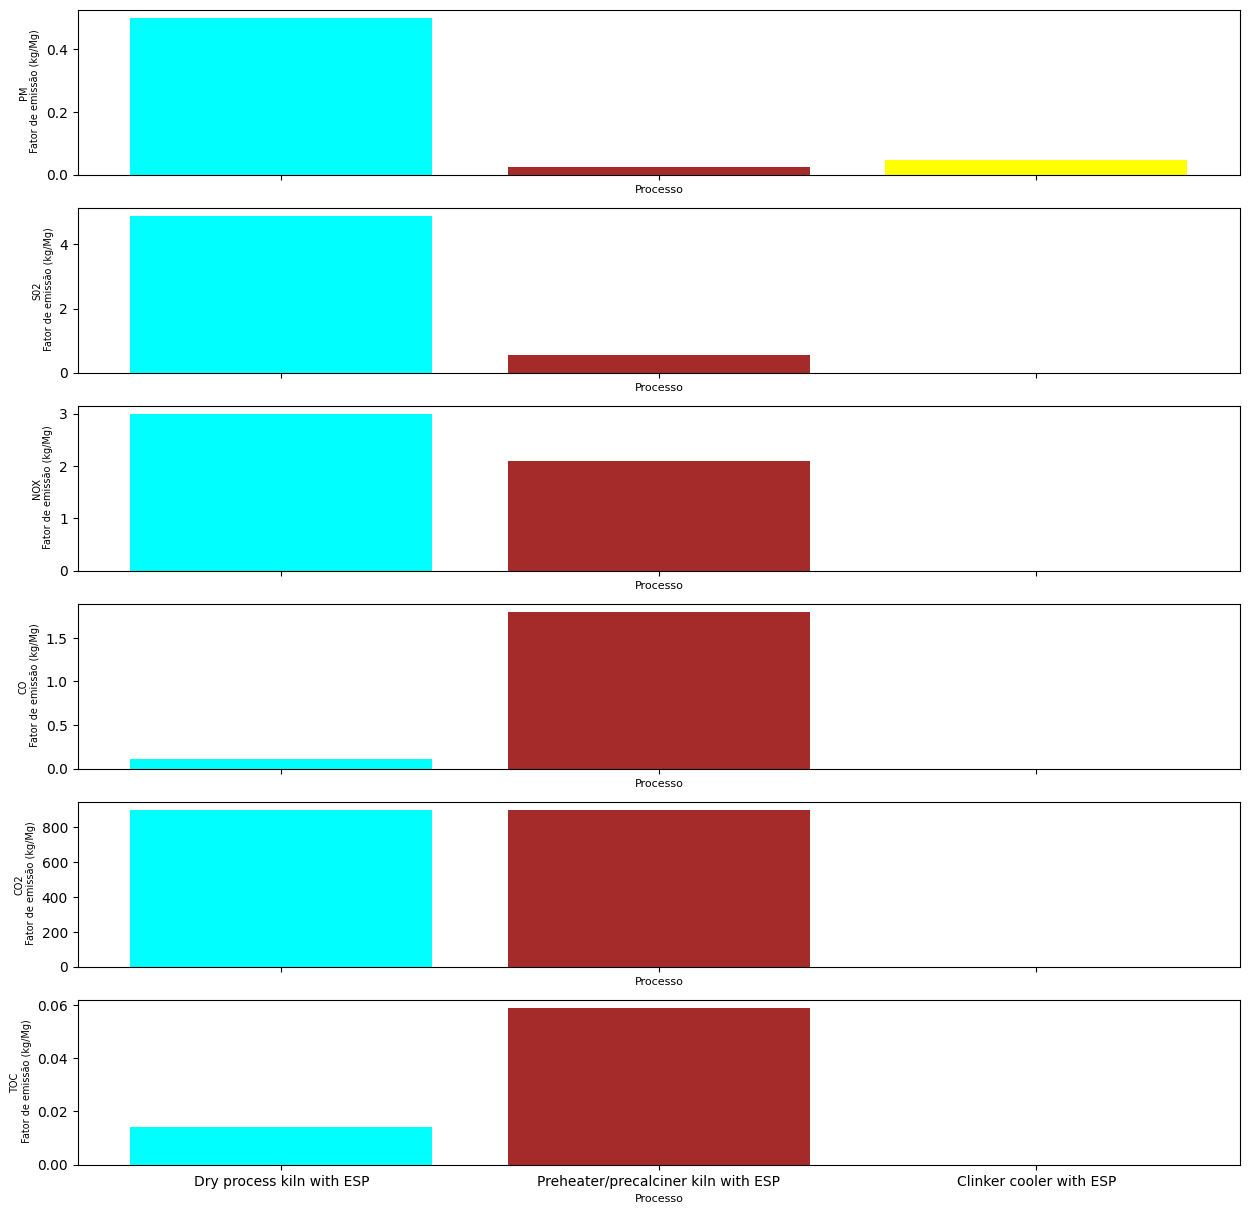

In [65]:
#Plotando os fatores de emissão

import matplotlib.pyplot as plt
#taxa de atividade anual de cimento:400000 ton/ano
#taxa de atividade anual de clinquer: 368000 ton/ano

atv = (368000/365) #tava de atividade diária de clinquer                
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(15,15)) #loop para preencher o subplot com os graficos de barra

#Criando a figura com Marplotlib
for ii in range(1, len(fe.columns)): #a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii], color = ['cyan','brown','yellow']) #colocar nessa figura nova
    ax[ii-1].set_xlabel('Processo', fontsize=8) #coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n Fator de emissão (kg/Mg)', fontsize=7) #ajeitar unidade g/kg

fig.savefig(cwd+'\\figuras\\barplot(fatorEmiss.png')

## Criando taxa de atividade aleatoria com sazonalidade
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabelidade também deve conter uma componete aleatória.

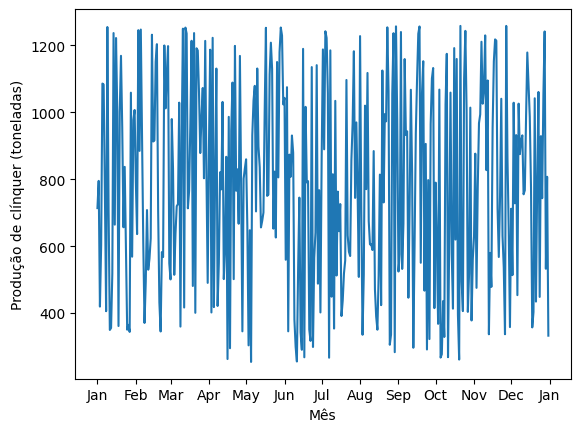

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

atvMax = 1260
atvMin = 252
n = 365
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)

# Definindo o eixo x como meses
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Formato de três letras para o mês

# Adicionando rótulos e título
ax.set_xlabel('Mês')
ax.set_ylabel('Produção de clínquer (toneladas)')  # Unidade da produção


plt.show()



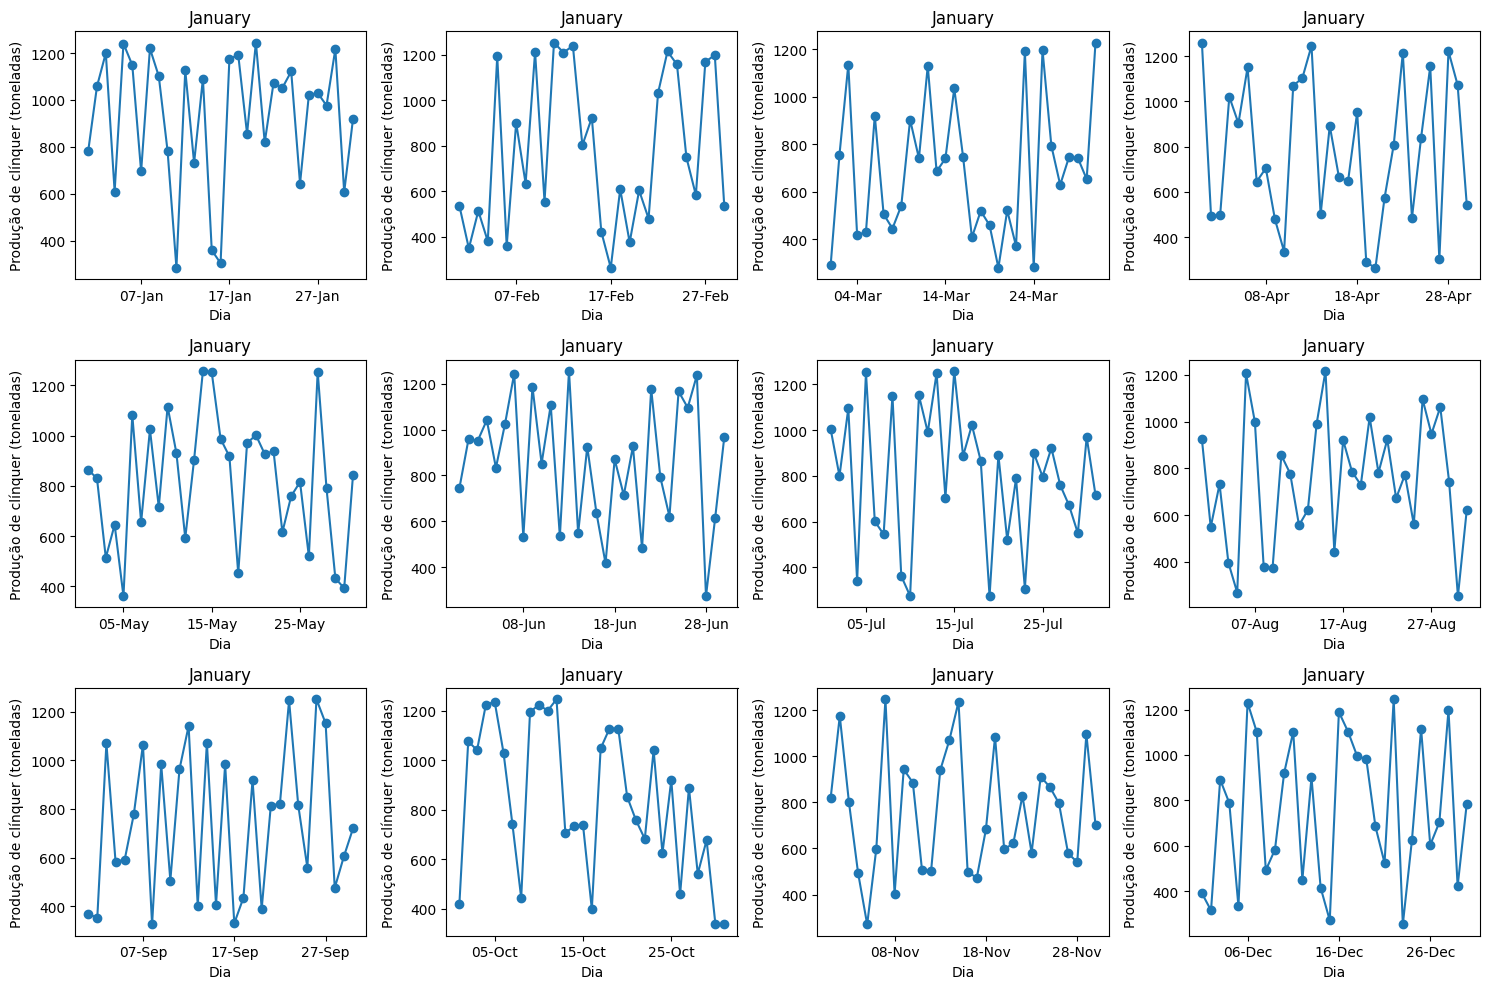

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Definindo os valores máximos e mínimos de produção
atvMax = 1260
atvMin = 252

# Gerando valores aleatórios de produção para um ano (365 dias)
n = 365
producao = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Criando uma lista de datas para um ano
datas = pd.date_range(start='2024-01-01', periods=n)

# Dividindo os dados de produção em listas correspondentes a cada mês
producao_por_mes = []
for mes in range(1, 13):
    producao_mes = producao[datas.month == mes]
    producao_por_mes.append(producao_mes)

# Criando um gráfico para cada mês
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # 3 linhas, 4 colunas para os 12 meses

for i, ax in enumerate(axs.flat):
    if i < len(producao_por_mes):
        ax.plot(datas[datas.month == i+1], producao_por_mes[i], marker='o')
        ax.set_title(datas.month_name()[i+1])
        ax.set_xlabel('Dia')
        ax.set_ylabel('Produção de clínquer (toneladas)')
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Apenas alguns dias visíveis para melhorar a legibilidade
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Formato de data dia-mês

# Ajustando o layout para melhor visualização
plt.tight_layout()
plt.show()


In [7]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1, 0, 0)
data_final = datetime(2024, 12, 31, 23, 0)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(hours=1)


# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-01 01:00:00
2024-01-01 02:00:00
2024-01-01 03:00:00
2024-01-01 04:00:00
2024-01-01 05:00:00
2024-01-01 06:00:00
2024-01-01 07:00:00
2024-01-01 08:00:00
2024-01-01 09:00:00
2024-01-01 10:00:00
2024-01-01 11:00:00
2024-01-01 12:00:00
2024-01-01 13:00:00
2024-01-01 14:00:00
2024-01-01 15:00:00
2024-01-01 16:00:00
2024-01-01 17:00:00
2024-01-01 18:00:00
2024-01-01 19:00:00
2024-01-01 20:00:00
2024-01-01 21:00:00
2024-01-01 22:00:00
2024-01-01 23:00:00
2024-01-02 00:00:00
2024-01-02 01:00:00
2024-01-02 02:00:00
2024-01-02 03:00:00
2024-01-02 04:00:00
2024-01-02 05:00:00
2024-01-02 06:00:00
2024-01-02 07:00:00
2024-01-02 08:00:00
2024-01-02 09:00:00
2024-01-02 10:00:00
2024-01-02 11:00:00
2024-01-02 12:00:00
2024-01-02 13:00:00
2024-01-02 14:00:00
2024-01-02 15:00:00
2024-01-02 16:00:00
2024-01-02 17:00:00
2024-01-02 18:00:00
2024-01-02 19:00:00
2024-01-02 20:00:00
2024-01-02 21:00:00
2024-01-02 22:00:00
2024-01-02 23:00:00
2024-01-03 00:00:00
2024-01-03 01:00:00


In [8]:
 #Ajustar meus números aleatórios com base no comprimento do vetor de datas

import pandas as pd
import numpy as np

# Criando um intervalo de datas e horas
start_date = '2024-01-01'
end_date = '2024-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='h')  # Frequência de uma hora

# Criando o DataFrame com as datas e valores de atividade aleatória
df = pd.DataFrame({'Data': date_range})

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Definindo valores para as atividades aleatórias
atvMax = 1260
atvMin = 252

# Criando atividade aleatória
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
df['Atividade'] = atv

# Salvando o DataFrame como um arquivo CSV
df.to_csv(r"C:\Users\admin\Documents\ENS5174_202401\tabelas\FE\atchpt_11_6.csv", index=False)

# Visualizando o DataFrame
print(df)



                    Data    Atividade
0    2024-01-01 00:00:00   649.785639
1    2024-01-01 01:00:00   583.537721
2    2024-01-01 02:00:00  1062.064833
3    2024-01-01 03:00:00  1233.618951
4    2024-01-01 04:00:00   690.635525
...                  ...          ...
8756 2024-12-30 20:00:00   397.614166
8757 2024-12-30 21:00:00   254.269997
8758 2024-12-30 22:00:00   948.505126
8759 2024-12-30 23:00:00  1256.628256
8760 2024-12-31 00:00:00  1006.206395

[8761 rows x 2 columns]


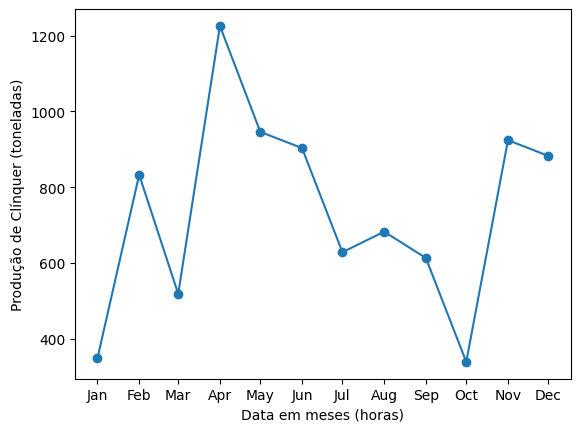

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definindo os valores máximos e mínimos de produção
atvMax = 1260
atvMin = 252

# Definindo o número de meses
n_meses = 12

# Gerando datas para um ano
datas = pd.date_range(start='2024-01-01', periods=n_meses, freq='MS')

# Gerando atividade aleatória para cada mês
atv = (atvMax - atvMin) * np.random.rand(n_meses) + atvMin

# Criando o DataFrame com as datas e atividades
df = pd.DataFrame({'Data': datas, 'Atividade': atv})

# Salvando o DataFrame como um arquivo CSV
df.to_csv(r"C:\Users\admin\Documents\ENS5174_202401\tabelas\FE\atchpt_11_6.csv", index=False)

# Plotando os valores para cada mês
fig, ax = plt.subplots()
ax.plot(df['Data'], df['Atividade'], marker='o')

# Adicionando rótulos e título
ax.xaxis.set_major_locator(mdates.MonthLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel('Produção de Clínquer (toneladas)')
ax.set_xlabel('Data em meses (horas)')

plt.show()



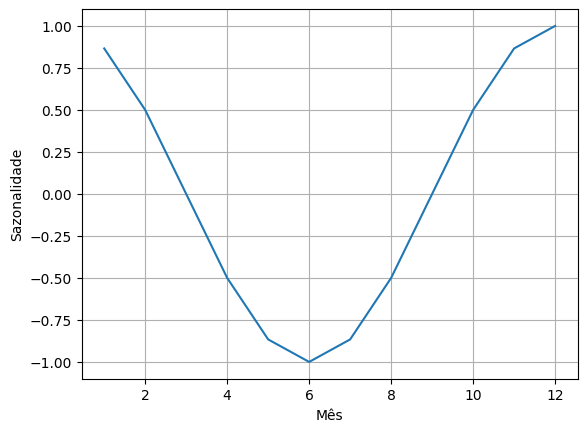

In [25]:
# Criando componente sazonal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do arquivo CSV
df = pd.read_csv(r"C:\Users\admin\Documents\ENS5174_202401\tabelas\FE\szchpt_11_6.csv")

# Criando componente sazonal
sazonalidade = np.cos((2 * np.pi) * df['Mes'] / 12)

# Plotando o gráfico com a linha contínua da sazonalidade
plt.plot(df['Mes'], sazonalidade)
plt.xlabel('Mês')
plt.ylabel('Sazonalidade')
plt.grid(True)
plt.show()




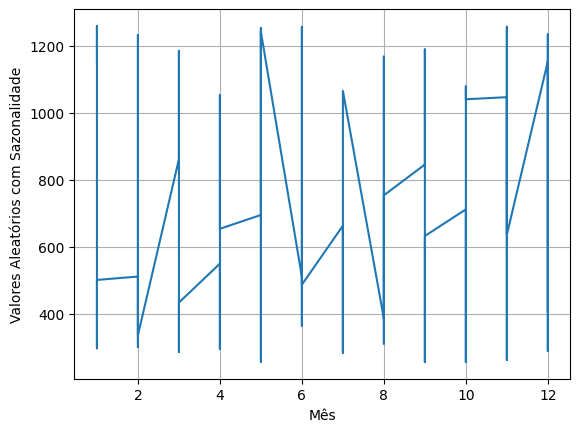

In [11]:
# Valores aleatórios com sazonalidade

import matplotlib.pyplot as plt

# Plotando o gráfico com uma linha contínua
plt.plot(df['Mes'], df['atividade'])
plt.xlabel('Mês')
plt.ylabel('Valores Aleatórios com Sazonalidade')
plt.grid(True)
plt.show()


In [12]:
# Cálculo das emissões para cada poluente
maior_atividade = df['atividade'].max()
print("O maior valor de atividade é:", maior_atividade,"g/s")
menor_atividade = df['atividade'].min()
print("O menor valor de atividade é:", menor_atividade, "g/s")


O maior valor de atividade é: 1259.360784911478 g/s
O menor valor de atividade é: 256.1897405888448 g/s
